In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency

In [3]:
cu = pd.read_csv('EDA_customer.csv')
tr = pd.read_csv('EDA_transaction2.csv')

In [4]:
pr = pd.read_csv('EDA_product.csv')

In [5]:
tr = tr.query('payment_status == "Success"')
tr['price'] = tr['item_price'] * tr['quantity']

In [6]:
tr

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),buy_age,price
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,44660.0,1,191247,2018,4 days,608.611583,17,191247
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193.0,1,145526,2018,3 days,1577.934908,22,145526
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686.0,4,135174,2018,2 days,525.418925,22,540696
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228.0,1,271012,2018,4 days,0.000000,22,271012
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220.0,1,198753,2018,5 days,0.000000,22,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254406,2020-11-12 18:19:20.074873+00:00,25121,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,Not Promoted,10000,2020-11-18 18:06:06.493534+00:00,287688,42899.0,1,277688,2020,5 days,465.701493,27,277688
1254408,2021-12-09 07:35:18.222046+00:00,34829,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,359203,19394.0,1,354213,2021,3 days,918.726839,15,354213
1254409,2021-12-11 01:20:36.944593+00:00,99645,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,1158159,24250.0,4,288835,2021,1 days,0.000000,30,1155340
1254410,2019-12-18 11:01:09.623382+00:00,87319,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,184143,11312.0,1,188646,2019,5 days,0.000000,12,188646


In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200872 entries, 0 to 1254411
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   created_at           1200872 non-null  object 
 1   customer_id          1200872 non-null  int64  
 2   session_id           1200872 non-null  object 
 3   payment_method       1200872 non-null  object 
 4   payment_status       1200872 non-null  object 
 5   promo_amount         1200872 non-null  int64  
 6   promo_code           1200872 non-null  object 
 7   shipment_fee         1200872 non-null  int64  
 8   shipment_date_limit  1200872 non-null  object 
 9   total_amount         1200872 non-null  int64  
 10  product_id           1200872 non-null  float64
 11  quantity             1200872 non-null  int64  
 12  item_price           1200872 non-null  int64  
 13  year                 1200872 non-null  int64  
 14  shipment_time        1200872 non-null  object 
 15

In [8]:
tr['transaction_month'] = pd.to_datetime(tr['created_at']).dt.to_period('M')


In [9]:
# 2016-06월 데이터는 하나 존재 >> 이상치로 간주 후, 데이터 삭제
tr = tr.drop([1200752], axis=0)

In [10]:
cu['first_join_month'] = pd.to_datetime(cu['first_join_date']).dt.to_period('M')


In [11]:
tr

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),buy_age,price,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,44660.0,1,191247,2018,4 days,608.611583,17,191247,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193.0,1,145526,2018,3 days,1577.934908,22,145526,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686.0,4,135174,2018,2 days,525.418925,22,540696,2018-09
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228.0,1,271012,2018,4 days,0.000000,22,271012,2018-11
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220.0,1,198753,2018,5 days,0.000000,22,198753,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254406,2020-11-12 18:19:20.074873+00:00,25121,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,Not Promoted,10000,2020-11-18 18:06:06.493534+00:00,287688,42899.0,1,277688,2020,5 days,465.701493,27,277688,2020-11
1254408,2021-12-09 07:35:18.222046+00:00,34829,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,359203,19394.0,1,354213,2021,3 days,918.726839,15,354213,2021-12
1254409,2021-12-11 01:20:36.944593+00:00,99645,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,1158159,24250.0,4,288835,2021,1 days,0.000000,30,1155340,2021-12
1254410,2019-12-18 11:01:09.623382+00:00,87319,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,184143,11312.0,1,188646,2019,5 days,0.000000,12,188646,2019-12


In [12]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200871 entries, 0 to 1254411
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype    
---  ------               --------------    -----    
 0   created_at           1200871 non-null  object   
 1   customer_id          1200871 non-null  int64    
 2   session_id           1200871 non-null  object   
 3   payment_method       1200871 non-null  object   
 4   payment_status       1200871 non-null  object   
 5   promo_amount         1200871 non-null  int64    
 6   promo_code           1200871 non-null  object   
 7   shipment_fee         1200871 non-null  int64    
 8   shipment_date_limit  1200871 non-null  object   
 9   total_amount         1200871 non-null  int64    
 10  product_id           1200871 non-null  float64  
 11  quantity             1200871 non-null  int64    
 12  item_price           1200871 non-null  int64    
 13  year                 1200871 non-null  int64    
 14  shipment_time     

In [13]:
tr = tr.drop_duplicates(subset='session_id')
tr

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),buy_age,price,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,44660.0,1,191247,2018,4 days,608.611583,17,191247,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193.0,1,145526,2018,3 days,1577.934908,22,145526,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686.0,4,135174,2018,2 days,525.418925,22,540696,2018-09
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228.0,1,271012,2018,4 days,0.000000,22,271012,2018-11
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220.0,1,198753,2018,5 days,0.000000,22,198753,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254406,2020-11-12 18:19:20.074873+00:00,25121,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,Not Promoted,10000,2020-11-18 18:06:06.493534+00:00,287688,42899.0,1,277688,2020,5 days,465.701493,27,277688,2020-11
1254408,2021-12-09 07:35:18.222046+00:00,34829,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,359203,19394.0,1,354213,2021,3 days,918.726839,15,354213,2021-12
1254409,2021-12-11 01:20:36.944593+00:00,99645,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,1158159,24250.0,4,288835,2021,1 days,0.000000,30,1155340,2021-12
1254410,2019-12-18 11:01:09.623382+00:00,87319,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,184143,11312.0,1,188646,2019,5 days,0.000000,12,188646,2019-12


In [14]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815874 entries, 0 to 1254411
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype    
---  ------               --------------   -----    
 0   created_at           815874 non-null  object   
 1   customer_id          815874 non-null  int64    
 2   session_id           815874 non-null  object   
 3   payment_method       815874 non-null  object   
 4   payment_status       815874 non-null  object   
 5   promo_amount         815874 non-null  int64    
 6   promo_code           815874 non-null  object   
 7   shipment_fee         815874 non-null  int64    
 8   shipment_date_limit  815874 non-null  object   
 9   total_amount         815874 non-null  int64    
 10  product_id           815874 non-null  float64  
 11  quantity             815874 non-null  int64    
 12  item_price           815874 non-null  int64    
 13  year                 815874 non-null  int64    
 14  shipment_time        815874 non-nul

In [15]:
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,2019-07
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,2017-07
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,2021-10
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,2000-11-17,2020-10-17,2020-10
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,1998-03-30,2017-11-25,2017-11
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,1993-01-12,2018-09-01,2018-09
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,2000-09-13,2020-05-31,2020-05


In [16]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype    
---  ------            --------------   -----    
 0   customer_id       100000 non-null  int64    
 1   gender            100000 non-null  object   
 2   age               100000 non-null  int64    
 3   join_age          100000 non-null  int64    
 4   device            100000 non-null  object   
 5   device_version    100000 non-null  object   
 6   device_version2   100000 non-null  int64    
 7   home_lat          100000 non-null  float64  
 8   home_long         100000 non-null  float64  
 9   home_location     100000 non-null  object   
 10  birthdate         100000 non-null  object   
 11  first_join_date   100000 non-null  object   
 12  first_join_month  100000 non-null  period[M]
dtypes: float64(2), int64(4), object(6), period[M](1)
memory usage: 9.9+ MB


# 고객별 이탈 위험 지수 계산

이탈 위험 지수 = 고객의 마지막 거래로부터 경과일 / 고객의 평균 거래 주기

In [17]:
# 'created_at'을 datetime 타입으로 변경
tr['created_at'] = pd.to_datetime(tr['created_at'])

# 각 고객별 마지막 거래일 계산
last_transaction_date = tr.groupby('customer_id')['created_at'].max()

# 각 고객별 모든 거래 간의 평균 주기 계산
tr_sorted = tr.sort_values(by=['customer_id', 'created_at'])
tr_sorted['prev_date'] = tr_sorted.groupby('customer_id')['created_at'].shift(1)
tr_sorted['days_diff'] = (tr_sorted['created_at'] - tr_sorted['prev_date']).dt.days
avg_transaction_period = tr_sorted.groupby('customer_id')['days_diff'].mean()

# 2022-08-01기준으로 마지막 거래로부터의 경과일 계산
reference_date = pd.Timestamp("2022-08-01").tz_localize('UTC') # 시간대 정보 추가
days_since_last_transaction = (reference_date - last_transaction_date).dt.days


# avg_transaction_period의 NaN 값을 평균값으로 대체
avg_transaction_period.fillna(avg_transaction_period.mean(), inplace=True)

# 이탈 위험 지수 다시 계산
churn_risk_index = days_since_last_transaction / avg_transaction_period

# 이탈 위험 지수의 NaN 값을 평균값으로 대체
churn_risk_index.fillna(churn_risk_index.mean(), inplace=True)

print(churn_risk_index)


customer_id
3         1.206030
8         1.013158
9         0.958084
11        0.928891
15        1.001209
           ...    
99992     1.063492
99995     0.165242
99997     5.261594
99998     1.007698
99999    13.475280
Length: 50240, dtype: float64


In [18]:
type(churn_risk_index)

pandas.core.series.Series

# 이탈 위험 지수에서 NaN 값 발생.

한 번만 거래한 고객이 경우 NaN 값 발생 -> 평균으로 대체

In [19]:
# 이탈 위험 지수 계산
churn_risk_index = np.where(avg_transaction_period != 0, 
                            days_since_last_transaction / avg_transaction_period, 
                            np.nan)


In [20]:
churn_risk_index

array([ 1.20603015,  1.01315789,  0.95808383, ...,  5.26159429,
        1.00769823, 13.47528017])

In [21]:
mean_value = np.nanmean(churn_risk_index)
mean_value

1.9756497154761632

In [22]:
# inf와 -inf를 NaN으로 변환
churn_risk_index[np.isinf(churn_risk_index)] = np.nan

# NaN 값을 평균값으로 대체
mean_value = np.nanmean(churn_risk_index)
churn_risk_index[np.isnan(churn_risk_index)] = mean_value

print(churn_risk_index)


[ 1.20603015  1.01315789  0.95808383 ...  5.26159429  1.00769823
 13.47528017]


In [23]:
max_value = churn_risk_index.max()
min_value = churn_risk_index.min()

print(f"이탈 위험 지수의 최댓값: {max_value}")
print(f"이탈 위험 지수의 최솟값: {min_value}")


이탈 위험 지수의 최댓값: 56.76
이탈 위험 지수의 최솟값: 0.0


In [24]:
print(last_transaction_date.max())
print(last_transaction_date.min())

2022-07-31 23:59:19.821469+00:00
2016-07-01 22:32:45.218400+00:00


In [25]:
# 'churn_risk_index'를 pandas Series로 변환
churn_risk_index_series = pd.Series(churn_risk_index, index=last_transaction_date.index)

# 이탈 위험 지수의 평균을 구함
average_risk_index = churn_risk_index_series.mean()

# 'cu' 데이터프레임에 이탈 라벨을 추가. 만약 해당 customer_id에 대한 이탈 위험 지수가 없다면 평균값으로 채움
cu['churn_risk_index'] = cu['customer_id'].map(churn_risk_index_series).fillna(average_risk_index)

# 타겟 컬럼 생성

- 이탈 위험 지수가 2 이상인 경우를 이탈로 지정하는 컬럼 (고객별 평균 거래 주기의 2배 이상 거래가 없을 시) 생성
- 만약 해당 customer_id에 대한 이탈 위험 지수가 없다면, 이탈 위험 지수의 평균값으로 대체
- churn 컬럼이 1이면 이탈, 0이면 이탈이 아님

In [26]:
tr

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),buy_age,price,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,44660.0,1,191247,2018,4 days,608.611583,17,191247,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193.0,1,145526,2018,3 days,1577.934908,22,145526,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686.0,4,135174,2018,2 days,525.418925,22,540696,2018-09
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228.0,1,271012,2018,4 days,0.000000,22,271012,2018-11
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220.0,1,198753,2018,5 days,0.000000,22,198753,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254406,2020-11-12 18:19:20.074873+00:00,25121,33c3bf4f-0f24-4eb8-879d-906bf7e7736a,Debit Card,Success,0,Not Promoted,10000,2020-11-18 18:06:06.493534+00:00,287688,42899.0,1,277688,2020,5 days,465.701493,27,277688,2020-11
1254408,2021-12-09 07:35:18.222046+00:00,34829,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,359203,19394.0,1,354213,2021,3 days,918.726839,15,354213,2021-12
1254409,2021-12-11 01:20:36.944593+00:00,99645,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,1158159,24250.0,4,288835,2021,1 days,0.000000,30,1155340,2021-12
1254410,2019-12-18 11:01:09.623382+00:00,87319,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,184143,11312.0,1,188646,2019,5 days,0.000000,12,188646,2019-12


In [27]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815874 entries, 0 to 1254411
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   created_at           815874 non-null  datetime64[ns, UTC]
 1   customer_id          815874 non-null  int64              
 2   session_id           815874 non-null  object             
 3   payment_method       815874 non-null  object             
 4   payment_status       815874 non-null  object             
 5   promo_amount         815874 non-null  int64              
 6   promo_code           815874 non-null  object             
 7   shipment_fee         815874 non-null  int64              
 8   shipment_date_limit  815874 non-null  object             
 9   total_amount         815874 non-null  int64              
 10  product_id           815874 non-null  float64            
 11  quantity             815874 non-null  int64              
 12  i

In [28]:
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn_risk_index
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,2019-07,1.975650
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,2017-07,1.975650
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08,0.226744
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,2021-10,1.975650
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11,2021-04,2.996627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,2000-11-17,2020-10-17,2020-10,0.209877
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,1998-03-30,2017-11-25,2017-11,0.767386
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,1993-01-12,2018-09-01,2018-09,0.136396
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,2000-09-13,2020-05-31,2020-05,1.975650


In [29]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype    
---  ------            --------------   -----    
 0   customer_id       100000 non-null  int64    
 1   gender            100000 non-null  object   
 2   age               100000 non-null  int64    
 3   join_age          100000 non-null  int64    
 4   device            100000 non-null  object   
 5   device_version    100000 non-null  object   
 6   device_version2   100000 non-null  int64    
 7   home_lat          100000 non-null  float64  
 8   home_long         100000 non-null  float64  
 9   home_location     100000 non-null  object   
 10  birthdate         100000 non-null  object   
 11  first_join_date   100000 non-null  object   
 12  first_join_month  100000 non-null  period[M]
 13  churn_risk_index  100000 non-null  float64  
dtypes: float64(3), int64(4), object(6), period[M](1)
memory usage: 10.7+ MB


In [30]:
# 'cu' 데이터에서 2022년 4월 이후 가입한 고객을 선택
new_cu = cu[cu['first_join_date'] >= '2022-04-01']

new_cu


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn_risk_index
11,74362,F,28,27,Android,2.3,2,-6.247471,106.851927,Jakarta Raya,1996-03-30,2022-06-18,2022-06,1.975650
21,65652,M,29,28,Android,3.2.4,3,-7.658314,109.414006,Jawa Tengah,1995-11-20,2022-04-09,2022-04,1.975650
36,83281,F,28,27,Android,3.2.3,3,-1.974956,101.813454,Jambi,1996-09-23,2022-05-15,2022-05,1.975650
51,56050,M,36,35,Android,7.1.2,7,-6.262810,106.799210,Jakarta Raya,1988-08-31,2022-05-29,2022-05,1.975650
70,61165,F,28,27,Android,7.0,7,0.977433,109.069866,Kalimantan Barat,1996-08-07,2022-05-22,2022-05,0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99922,63919,F,25,24,Android,2.0,2,-8.194514,113.051224,Jawa Timur,1999-01-06,2022-04-02,2022-04,1.975650
99961,92122,M,23,22,Android,4.0.3,4,-6.937104,111.972753,Jawa Timur,2001-04-12,2022-04-22,2022-04,0.960000
99964,76441,M,22,21,Android,2.3.3,2,-4.613473,104.986218,Lampung,2002-07-24,2022-06-25,2022-06,0.222679
99968,31617,F,25,24,Android,4.2.2,4,-6.126077,106.770091,Jakarta Raya,1999-07-01,2022-07-30,2022-07,1.975650


In [31]:
# tr 데이터를 고객별로 그룹화하고 거래 횟수를 집계
tr_count = tr.groupby('customer_id').size().reset_index(name='total_tr_cnt')

# cu 데이터와 tr_count 데이터를 customer_id 기준으로 왼쪽 조인
cu = cu.merge(tr_count, on='customer_id', how='left')

# 거래 횟수가 없는 고객의 경우 NaN 값이 생성될 수 있으므로 0으로 채워줌
cu['total_tr_cnt'] = cu['total_tr_cnt'].fillna(0).astype(int)

cu


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn_risk_index,total_tr_cnt
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,2019-07,1.975650,0
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,2017-07,1.975650,0
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08,0.226744,79
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,2021-10,1.975650,0
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11,2021-04,2.996627,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,2000-11-17,2020-10-17,2020-10,0.209877,35
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,1998-03-30,2017-11-25,2017-11,0.767386,41
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,1993-01-12,2018-09-01,2018-09,0.136396,96
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,2000-09-13,2020-05-31,2020-05,1.975650,0


In [32]:
tr.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),buy_age,price,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,44660.0,1,191247,2018,4 days,608.611583,17,191247,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193.0,1,145526,2018,3 days,1577.934908,22,145526,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686.0,4,135174,2018,2 days,525.418925,22,540696,2018-09
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228.0,1,271012,2018,4 days,0.000000,22,271012,2018-11
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220.0,1,198753,2018,5 days,0.000000,22,198753,2018-12


In [33]:
# tr 데이터를 고객별로 그룹화하고 최대 거래 날짜를 찾음
last_tr_date = tr.groupby('customer_id')['created_at'].max().reset_index(name='last_tr_date')

# cu 데이터와 last_tr_date 데이터를 customer_id 기준으로 왼쪽 조인
cu = cu.merge(last_tr_date, on='customer_id', how='left')

cu.head()


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn_risk_index,total_tr_cnt,last_tr_date
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,2019-07,1.975650,0,NaT
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,2017-07,1.975650,0,NaT
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08,0.226744,79,2022-07-29 06:50:16.916342+00:00
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,2021-10,1.975650,0,NaT
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11,2021-04,2.996627,1,2021-04-16 09:20:03.134253+00:00


In [34]:
# 'last_tr_date' 컬럼의 데이터 타입이 날짜 형식이라고 가정
# 만약 문자열이면 날짜 형식으로 변환해야 함
cu['last_tr_date'] = pd.to_datetime(cu['last_tr_date'])

# 조건에 따라 churn 컬럼 값 설정
cu['churn'] = (
    (cu['total_tr_cnt'] < 2) |          # 총 거래횟수가 2회 미만
    (cu['last_tr_date'].isna()) |       # 마지막 거래가 없음 (거래 없음)
    (cu['last_tr_date'] < '2022-04-01') # 마지막 거래가 2022년4월1일 이전이면 이탈
).astype(int) # 위 조건을 만족하면 True. astype(int)를 사용하여 Boolean 값 (True/False)을 정수 값 (1/0)으로 변환

print(cu[['customer_id', 'total_tr_cnt', 'last_tr_date', 'churn']].head())


   customer_id  total_tr_cnt                     last_tr_date  churn
0         2870             0                              NaT      1
1         8193             0                              NaT      1
2         7279            79 2022-07-29 06:50:16.916342+00:00      0
3        88813             0                              NaT      1
4        82542             1 2021-04-16 09:20:03.134253+00:00      1


In [35]:
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn_risk_index,total_tr_cnt,last_tr_date,churn
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,2019-07,1.975650,0,NaT,1
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,2017-07,1.975650,0,NaT,1
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08,0.226744,79,2022-07-29 06:50:16.916342+00:00,0
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,2021-10,1.975650,0,NaT,1
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11,2021-04,2.996627,1,2021-04-16 09:20:03.134253+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,2000-11-17,2020-10-17,2020-10,0.209877,35,2022-07-27 21:58:48.213881+00:00,0
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,1998-03-30,2017-11-25,2017-11,0.767386,41,2022-06-29 21:26:41.603013+00:00,0
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,1993-01-12,2018-09-01,2018-09,0.136396,96,2022-07-29 07:44:46.257434+00:00,0
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,2000-09-13,2020-05-31,2020-05,1.975650,0,NaT,1


In [36]:
churn_ratio = cu['churn'].value_counts(normalize=True)

churn_ratio


1    0.74825
0    0.25175
Name: churn, dtype: float64

In [37]:
# 'month_tr' 컬럼 생성
cu['month_tr'] = cu['total_tr_cnt'] / 73

print(cu.head())


   customer_id gender  age  join_age   device device_version  device_version2  \
0         2870      F   28        24   iPhone         14.2.1               14   
1         8193      F   31        25  Android          2.2.1                2   
2         7279      M   35        32     iPad          4.2.1                4   
3        88813      M   33        31     iPad           14.2               14   
4        82542      M   24        22   iPhone         10.3.3               10   

   home_lat   home_long        home_location   birthdate first_join_date  \
0 -1.043345  101.360523       Sumatera Barat  1996-06-14      2019-07-21   
1 -6.212489  106.818850         Jakarta Raya  1993-08-16      2017-07-16   
2 -8.631607  116.428436  Nusa Tenggara Barat  1989-01-23      2020-08-23   
3  1.299332  115.774934     Kalimantan Timur  1991-01-05      2021-10-03   
4 -2.980807  114.924675   Kalimantan Selatan  2000-07-15      2021-04-11   

  first_join_month  churn_risk_index  total_tr_cnt  \
0 

In [38]:
tr.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),buy_age,price,transaction_month
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,44660.0,1,191247,2018,4 days,608.611583,17,191247,2018-07
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193.0,1,145526,2018,3 days,1577.934908,22,145526,2018-07
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686.0,4,135174,2018,2 days,525.418925,22,540696,2018-09
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228.0,1,271012,2018,4 days,0.000000,22,271012,2018-11
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220.0,1,198753,2018,5 days,0.000000,22,198753,2018-12


In [39]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815874 entries, 0 to 1254411
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   created_at           815874 non-null  datetime64[ns, UTC]
 1   customer_id          815874 non-null  int64              
 2   session_id           815874 non-null  object             
 3   payment_method       815874 non-null  object             
 4   payment_status       815874 non-null  object             
 5   promo_amount         815874 non-null  int64              
 6   promo_code           815874 non-null  object             
 7   shipment_fee         815874 non-null  int64              
 8   shipment_date_limit  815874 non-null  object             
 9   total_amount         815874 non-null  int64              
 10  product_id           815874 non-null  float64            
 11  quantity             815874 non-null  int64              
 12  i

In [40]:
# 1. tr 데이터에서 고객별 총 결제 금액을 계산합니다.
total_price = tr.groupby('customer_id')['price'].sum().reset_index(name='total_price')

# 2. cu 데이터와 total_price 데이터를 customer_id 기준으로 조인합니다.
cu = cu.merge(total_price, on='customer_id', how='left')

# 3. 총 결제 금액을 총 거래 횟수로 나누어 평균 결제 금액을 구합니다.
cu['average_price'] = cu['total_price'] / cu['total_tr_cnt']

cu.head()

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date,first_join_month,churn_risk_index,total_tr_cnt,last_tr_date,churn,month_tr,total_price,average_price
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,1996-06-14,2019-07-21,2019-07,1.975650,0,NaT,1,0.000000,NaN,NaN
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,1993-08-16,2017-07-16,2017-07,1.975650,0,NaT,1,0.000000,NaN,NaN
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,1989-01-23,2020-08-23,2020-08,0.226744,79,2022-07-29 06:50:16.916342+00:00,0,1.082192,32759843.0,414681.556962
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,1991-01-05,2021-10-03,2021-10,1.975650,0,NaT,1,0.000000,NaN,NaN
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2000-07-15,2021-04-11,2021-04,2.996627,1,2021-04-16 09:20:03.134253+00:00,1,0.013699,115702.0,115702.000000


In [41]:
# 1. 프로모션 코드가 'Not Promoted'가 아닌 데이터만 필터링합니다.
promo_tr = tr[tr['promo_code'] != 'Not Promoted']

# 2. 고객별로 그룹화하여 프로모션을 사용한 거래 횟수를 카운트합니다.
promo_counts = promo_tr.groupby('customer_id').size().reset_index(name='promo_count')

# 3. cu 데이터와 promo_counts 데이터를 customer_id 기준으로 조인합니다.
cu = cu.merge(promo_counts, on='customer_id', how='left')

# 프로모션을 사용하지 않은 고객의 경우 NaN 값이 들어갈 것이므로, 0으로 채웁니다.
cu['promo_count'].fillna(0, inplace=True)

# 결과 출력
cu.head()


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,first_join_date,first_join_month,churn_risk_index,total_tr_cnt,last_tr_date,churn,month_tr,total_price,average_price,promo_count
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,2019-07-21,2019-07,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,2017-07-16,2017-07,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,2020-08-23,2020-08,0.226744,79,2022-07-29 06:50:16.916342+00:00,0,1.082192,32759843.0,414681.556962,17.0
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,2021-10-03,2021-10,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,2021-04-11,2021-04,2.996627,1,2021-04-16 09:20:03.134253+00:00,1,0.013699,115702.0,115702.000000,0.0


In [42]:
# 1. tr 데이터에서 promo_code 가 'Not Promoted'가 아닌 거래만 필터링합니다.
promo_tr = tr[tr['promo_code'] != 'Not Promoted']

# 2. 필터링된 데이터를 고객별로 그룹화하고 promo_amount 컬럼의 평균을 계산합니다.
average_promo = promo_tr.groupby('customer_id')['promo_amount'].mean().reset_index(name='average_promo_amount')

# 3. cu 데이터와 average_promo 데이터를 customer_id 기준으로 조인합니다.
cu = cu.merge(average_promo, on='customer_id', how='left')

# 프로모션을 한 번도 사용하지 않은 고객의 경우 NaN 값이 들어갈 수 있으므로, 0으로 채웁니다.
cu['average_promo_amount'].fillna(0, inplace=True)

print(cu.head())


   customer_id gender  age  join_age   device device_version  device_version2  \
0         2870      F   28        24   iPhone         14.2.1               14   
1         8193      F   31        25  Android          2.2.1                2   
2         7279      M   35        32     iPad          4.2.1                4   
3        88813      M   33        31     iPad           14.2               14   
4        82542      M   24        22   iPhone         10.3.3               10   

   home_lat   home_long        home_location  ... first_join_month  \
0 -1.043345  101.360523       Sumatera Barat  ...          2019-07   
1 -6.212489  106.818850         Jakarta Raya  ...          2017-07   
2 -8.631607  116.428436  Nusa Tenggara Barat  ...          2020-08   
3  1.299332  115.774934     Kalimantan Timur  ...          2021-10   
4 -2.980807  114.924675   Kalimantan Selatan  ...          2021-04   

  churn_risk_index total_tr_cnt                     last_tr_date  churn  \
0         1.97565

In [43]:
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,first_join_month,churn_risk_index,total_tr_cnt,last_tr_date,churn,month_tr,total_price,average_price,promo_count,average_promo_amount
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,2019-07,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,2017-07,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,2020-08,0.226744,79,2022-07-29 06:50:16.916342+00:00,0,1.082192,32759843.0,414681.556962,17.0,5386.117647
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,2021-10,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,2021-04,2.996627,1,2021-04-16 09:20:03.134253+00:00,1,0.013699,115702.0,115702.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,...,2020-10,0.209877,35,2022-07-27 21:58:48.213881+00:00,0,0.479452,11374655.0,324990.142857,12.0,7045.166667
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,...,2017-11,0.767386,41,2022-06-29 21:26:41.603013+00:00,0,0.561644,22853568.0,557404.097561,13.0,5376.692308
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,...,2018-09,0.136396,96,2022-07-29 07:44:46.257434+00:00,0,1.315068,36102735.0,376070.156250,36.0,4931.111111
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,...,2020-05,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000


In [44]:
cu.device_version.unique()

array(['14.2.1', '2.2.1', '4.2.1', '14.2', '10.3.3', '4.0.4', '8.1.0',
       '4.2', '4.0.1', '2.2.2', '2.3', '7.1.1', '2.3.3', '6.1.6', '4.1.2',
       '3.2.6', '11', '3.2.4', '6.0.1', '5.1', '2.0.1', '7.1', '8.0.0',
       '3.2', '3.2.5', '5.0.1', '3.2.3', '9.3.6', '2.3.1', '2.0', '5.1.1',
       '2.3.6', '5.0.2', '3.1', '7.1.2', '2.3.5', '4.2.2', '4.3', '4.0.3',
       '10.3.4', '9.3.5', '4.4', '4.3.1', '3.1.3', '7.0', '1.5', '4.4.3',
       '4.4.1', '2.3.4', '4.0.2', '2.3.2', '12.4.8', '2.3.7', '1.1',
       '2.1', '5.0', '3.2.2', '2.2.3', '10', '4.1', '3.2.1', '2.2',
       '4.4.2', '4.1.1', '9', '1.0', '6.0', '4.0', '1.6', '3.0', '4.4.4'],
      dtype=object)

In [45]:
cu.device_version2.unique()

array([14,  2,  4, 10,  8,  7,  6,  3, 11,  5,  9,  1, 12], dtype=int64)

In [46]:
# PeriodDtype을 datetime으로 변환
cu['first_join_month'] = cu['first_join_month'].dt.to_timestamp()

end_date = pd.Timestamp('2022-08-01')

# 가입 기간을 월로 계산
cu['join_period'] = (end_date.year - cu['first_join_month'].dt.year) * 12 + end_date.month - cu['first_join_month'].dt.month


In [47]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815874 entries, 0 to 1254411
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   created_at           815874 non-null  datetime64[ns, UTC]
 1   customer_id          815874 non-null  int64              
 2   session_id           815874 non-null  object             
 3   payment_method       815874 non-null  object             
 4   payment_status       815874 non-null  object             
 5   promo_amount         815874 non-null  int64              
 6   promo_code           815874 non-null  object             
 7   shipment_fee         815874 non-null  int64              
 8   shipment_date_limit  815874 non-null  object             
 9   total_amount         815874 non-null  int64              
 10  product_id           815874 non-null  float64            
 11  quantity             815874 non-null  int64              
 12  i

In [48]:
cu.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   customer_id           100000 non-null  int64              
 1   gender                100000 non-null  object             
 2   age                   100000 non-null  int64              
 3   join_age              100000 non-null  int64              
 4   device                100000 non-null  object             
 5   device_version        100000 non-null  object             
 6   device_version2       100000 non-null  int64              
 7   home_lat              100000 non-null  float64            
 8   home_long             100000 non-null  float64            
 9   home_location         100000 non-null  object             
 10  birthdate             100000 non-null  object             
 11  first_join_date       100000 non-null  object        

In [49]:
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,churn_risk_index,total_tr_cnt,last_tr_date,churn,month_tr,total_price,average_price,promo_count,average_promo_amount,join_period
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000,37
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000,61
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,0.226744,79,2022-07-29 06:50:16.916342+00:00,0,1.082192,32759843.0,414681.556962,17.0,5386.117647,24
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000,10
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,2.996627,1,2021-04-16 09:20:03.134253+00:00,1,0.013699,115702.0,115702.000000,0.0,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,...,0.209877,35,2022-07-27 21:58:48.213881+00:00,0,0.479452,11374655.0,324990.142857,12.0,7045.166667,22
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,...,0.767386,41,2022-06-29 21:26:41.603013+00:00,0,0.561644,22853568.0,557404.097561,13.0,5376.692308,57
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,...,0.136396,96,2022-07-29 07:44:46.257434+00:00,0,1.315068,36102735.0,376070.156250,36.0,4931.111111,47
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000,27


In [50]:
# join_period가 0인 경우 1로 처리, 아니면 원래 값 사용
cu['adjusted_period'] = np.where(cu['join_period'] == 0, 1, cu['join_period'])

# 'month_tr' 컬럼 업데이트
cu['month_tr'] = cu['total_tr_cnt'] / cu['adjusted_period']

# adjusted_period 컬럼 삭제
cu.drop('adjusted_period', axis=1, inplace=True)

cu


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,churn_risk_index,total_tr_cnt,last_tr_date,churn,month_tr,total_price,average_price,promo_count,average_promo_amount,join_period
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000,37
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000,61
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,0.226744,79,2022-07-29 06:50:16.916342+00:00,0,3.291667,32759843.0,414681.556962,17.0,5386.117647,24
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000,10
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,2.996627,1,2021-04-16 09:20:03.134253+00:00,1,0.062500,115702.0,115702.000000,0.0,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,...,0.209877,35,2022-07-27 21:58:48.213881+00:00,0,1.590909,11374655.0,324990.142857,12.0,7045.166667,22
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,...,0.767386,41,2022-06-29 21:26:41.603013+00:00,0,0.719298,22853568.0,557404.097561,13.0,5376.692308,57
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,...,0.136396,96,2022-07-29 07:44:46.257434+00:00,0,2.042553,36102735.0,376070.156250,36.0,4931.111111,47
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.0,0.000000,27


In [51]:
# join_period가 0인 경우 1로 처리, 아니면 원래 값 사용
cu['adjusted_period'] = np.where(cu['join_period'] == 0, 1, cu['join_period'])

# 'promo_count' 컬럼 업데이트
cu['promo_count'] = cu['promo_count'] / cu['adjusted_period']

# adjusted_period 컬럼 삭제
cu.drop('adjusted_period', axis=1, inplace=True)

# 결과 출력
cu.head()


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,churn_risk_index,total_tr_cnt,last_tr_date,churn,month_tr,total_price,average_price,promo_count,average_promo_amount,join_period
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,37
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,61
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,0.226744,79,2022-07-29 06:50:16.916342+00:00,0,3.291667,32759843.0,414681.556962,0.708333,5386.117647,24
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,10
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,2.996627,1,2021-04-16 09:20:03.134253+00:00,1,0.062500,115702.0,115702.000000,0.000000,0.000000,16


In [52]:
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,churn_risk_index,total_tr_cnt,last_tr_date,churn,month_tr,total_price,average_price,promo_count,average_promo_amount,join_period
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,37
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,61
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,0.226744,79,2022-07-29 06:50:16.916342+00:00,0,3.291667,32759843.0,414681.556962,0.708333,5386.117647,24
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,10
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,2.996627,1,2021-04-16 09:20:03.134253+00:00,1,0.062500,115702.0,115702.000000,0.000000,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,...,0.209877,35,2022-07-27 21:58:48.213881+00:00,0,1.590909,11374655.0,324990.142857,0.545455,7045.166667,22
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,...,0.767386,41,2022-06-29 21:26:41.603013+00:00,0,0.719298,22853568.0,557404.097561,0.228070,5376.692308,57
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,...,0.136396,96,2022-07-29 07:44:46.257434+00:00,0,2.042553,36102735.0,376070.156250,0.765957,4931.111111,47
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,...,1.975650,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,27


In [53]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   customer_id           100000 non-null  int64              
 1   gender                100000 non-null  object             
 2   age                   100000 non-null  int64              
 3   join_age              100000 non-null  int64              
 4   device                100000 non-null  object             
 5   device_version        100000 non-null  object             
 6   device_version2       100000 non-null  int64              
 7   home_lat              100000 non-null  float64            
 8   home_long             100000 non-null  float64            
 9   home_location         100000 non-null  object             
 10  birthdate             100000 non-null  object             
 11  first_join_date       100000 non-null  object        

In [54]:
# first_join_month 컬럼에서 연도 부분만 추출하여 first_join_year 컬럼 생성
cu['first_join_year'] = cu['first_join_month'].astype(str).str[:4]

# 결과 출력
cu.head()


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,total_tr_cnt,last_tr_date,churn,month_tr,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,37,2019
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,61,2017
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,79,2022-07-29 06:50:16.916342+00:00,0,3.291667,32759843.0,414681.556962,0.708333,5386.117647,24,2020
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,0,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,10,2021
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,1,2021-04-16 09:20:03.134253+00:00,1,0.062500,115702.0,115702.000000,0.000000,0.000000,16,2021


In [55]:
# tr 데이터에서 고객별 거래 날짜를 리스트로 추출
tr_dates = tr.groupby('customer_id')['created_at'].apply(list).reset_index(name='tr_dates')

# 거래 주기 계산 함수 정의
def calculate_cycle(dates):
    if len(dates) < 2:  # 거래가 없거나 한 번만 진행된 경우
        return np.nan
    else:
        # 거래 날짜의 차이 계산
        diffs = [dates[i+1] - dates[i] for i in range(len(dates)-1)]
        # 거래 날짜의 차이의 평균 반환
        return np.mean(diffs).days

# apply 함수를 사용해 거래 주기 계산
tr_dates['purchase_cycle'] = tr_dates['tr_dates'].apply(calculate_cycle)

# cu 데이터에 purchase_cycle 데이터 조인
cu = cu.merge(tr_dates[['customer_id', 'purchase_cycle']], on='customer_id', how='left')

# 결과 확인
cu


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,last_tr_date,churn,month_tr,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,37,2019,NaN
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,61,2017,NaN
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,2022-07-29 06:50:16.916342+00:00,0,3.291667,32759843.0,414681.556962,0.708333,5386.117647,24,2020,9.0
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,10,2021,NaN
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,2021-04-16 09:20:03.134253+00:00,1,0.062500,115702.0,115702.000000,0.000000,0.000000,16,2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,...,2022-07-27 21:58:48.213881+00:00,0,1.590909,11374655.0,324990.142857,0.545455,7045.166667,22,2020,19.0
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,...,2022-06-29 21:26:41.603013+00:00,0,0.719298,22853568.0,557404.097561,0.228070,5376.692308,57,2017,41.0
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,...,2022-07-29 07:44:46.257434+00:00,0,2.042553,36102735.0,376070.156250,0.765957,4931.111111,47,2018,15.0
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,...,NaT,1,0.000000,NaN,NaN,0.000000,0.000000,27,2020,NaN


In [56]:
# shipment_time 컬럼에서 숫자만 추출하는 함수 정의
def extract_days(text):
    return int(text.split()[0])

# shipment_time 컬럼에서 숫자만 추출하여 새로운 컬럼 생성
tr['delivery_days'] = tr['shipment_time'].apply(extract_days)

# 고객별 평균 배송 기간 계산
avg_delivery = tr.groupby('customer_id')['delivery_days'].mean().reset_index(name='delivery_period')

# cu 데이터에 조인
cu = cu.merge(avg_delivery, on='customer_id', how='left')

# 결과 확인
cu.head()


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,churn,month_tr,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,1,0.000000,NaN,NaN,0.000000,0.000000,37,2019,NaN,NaN
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,1,0.000000,NaN,NaN,0.000000,0.000000,61,2017,NaN,NaN
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,0,3.291667,32759843.0,414681.556962,0.708333,5386.117647,24,2020,9.0,3.075949
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,1,0.000000,NaN,NaN,0.000000,0.000000,10,2021,NaN,NaN
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,1,0.062500,115702.0,115702.000000,0.000000,0.000000,16,2021,NaN,1.000000


In [57]:
# 고객별 평균 배송료 계산
avg_shipment_fee = tr.groupby('customer_id')['shipment_fee'].mean().reset_index(name='average_shipment_fee')

# cu 데이터에 조인
cu = cu.merge(avg_shipment_fee, on='customer_id', how='left')

# 결과 확인
cu.head()


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,month_tr,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,0.000000,NaN,NaN,0.000000,0.000000,37,2019,NaN,NaN,NaN
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,0.000000,NaN,NaN,0.000000,0.000000,61,2017,NaN,NaN,NaN
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,3.291667,32759843.0,414681.556962,0.708333,5386.117647,24,2020,9.0,3.075949,8860.759494
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,0.000000,NaN,NaN,0.000000,0.000000,10,2021,NaN,NaN,NaN
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,0.062500,115702.0,115702.000000,0.000000,0.000000,16,2021,NaN,1.000000,0.000000


In [58]:
# 고객별 평균 배송 거리 계산
avg_distance = tr.groupby('customer_id')['distance(km)'].mean().reset_index(name='average_distance')

# cu 데이터에 조인
cu = cu.merge(avg_distance, on='customer_id', how='left')

# 결과 확인
cu.head()


,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,NaN,NaN,0.000000,0.000000,37,2019,NaN,NaN,NaN,NaN
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,NaN,NaN,0.000000,0.000000,61,2017,NaN,NaN,NaN,NaN
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,32759843.0,414681.556962,0.708333,5386.117647,24,2020,9.0,3.075949,8860.759494,752.832362
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,NaN,NaN,0.000000,0.000000,10,2021,NaN,NaN,NaN,NaN
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,115702.0,115702.000000,0.000000,0.000000,16,2021,NaN,1.000000,0.000000,0.000000


In [59]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   customer_id           100000 non-null  int64              
 1   gender                100000 non-null  object             
 2   age                   100000 non-null  int64              
 3   join_age              100000 non-null  int64              
 4   device                100000 non-null  object             
 5   device_version        100000 non-null  object             
 6   device_version2       100000 non-null  int64              
 7   home_lat              100000 non-null  float64            
 8   home_long             100000 non-null  float64            
 9   home_location         100000 non-null  object             
 10  birthdate             100000 non-null  object             
 11  first_join_date       100000 non-null  object        

In [60]:
cu.first_join_date

0        2019-07-21
1        2017-07-16
2        2020-08-23
3        2021-10-03
4        2021-04-11
            ...    
99995    2020-10-17
99996    2017-11-25
99997    2018-09-01
99998    2020-05-31
99999    2021-07-17
Name: first_join_date, Length: 100000, dtype: object

In [61]:
cu.first_join_month      

0       2019-07-01
1       2017-07-01
2       2020-08-01
3       2021-10-01
4       2021-04-01
           ...    
99995   2020-10-01
99996   2017-11-01
99997   2018-09-01
99998   2020-05-01
99999   2021-07-01
Name: first_join_month, Length: 100000, dtype: datetime64[ns]

In [62]:
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,NaN,NaN,0.000000,0.000000,37,2019,NaN,NaN,NaN,NaN
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,NaN,NaN,0.000000,0.000000,61,2017,NaN,NaN,NaN,NaN
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,32759843.0,414681.556962,0.708333,5386.117647,24,2020,9.0,3.075949,8860.759494,752.832362
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,NaN,NaN,0.000000,0.000000,10,2021,NaN,NaN,NaN,NaN
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,115702.0,115702.000000,0.000000,0.000000,16,2021,NaN,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,...,11374655.0,324990.142857,0.545455,7045.166667,22,2020,19.0,3.400000,8000.000000,522.233922
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,...,22853568.0,557404.097561,0.228070,5376.692308,57,2017,41.0,3.097561,9634.146341,1443.259657
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,...,36102735.0,376070.156250,0.765957,4931.111111,47,2018,15.0,3.145833,8489.583333,1101.739088
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,...,NaN,NaN,0.000000,0.000000,27,2020,NaN,NaN,NaN,NaN


In [63]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   customer_id           100000 non-null  int64              
 1   gender                100000 non-null  object             
 2   age                   100000 non-null  int64              
 3   join_age              100000 non-null  int64              
 4   device                100000 non-null  object             
 5   device_version        100000 non-null  object             
 6   device_version2       100000 non-null  int64              
 7   home_lat              100000 non-null  float64            
 8   home_long             100000 non-null  float64            
 9   home_location         100000 non-null  object             
 10  birthdate             100000 non-null  object             
 11  first_join_date       100000 non-null  object        

# 결측치 처리

In [64]:
cu['average_price'].fillna(0, inplace=True)
cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   customer_id           100000 non-null  int64              
 1   gender                100000 non-null  object             
 2   age                   100000 non-null  int64              
 3   join_age              100000 non-null  int64              
 4   device                100000 non-null  object             
 5   device_version        100000 non-null  object             
 6   device_version2       100000 non-null  int64              
 7   home_lat              100000 non-null  float64            
 8   home_long             100000 non-null  float64            
 9   home_location         100000 non-null  object             
 10  birthdate             100000 non-null  object             
 11  first_join_date       100000 non-null  object        

In [65]:
cu = cu.loc[:, ~cu.columns.duplicated()]


In [66]:
cu.head()

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,NaN,0.000000,0.000000,0.000000,37,2019,NaN,NaN,NaN,NaN
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,NaN,0.000000,0.000000,0.000000,61,2017,NaN,NaN,NaN,NaN
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,32759843.0,414681.556962,0.708333,5386.117647,24,2020,9.0,3.075949,8860.759494,752.832362
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,NaN,0.000000,0.000000,0.000000,10,2021,NaN,NaN,NaN,NaN
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,115702.0,115702.000000,0.000000,0.000000,16,2021,NaN,1.000000,0.000000,0.000000


In [67]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   customer_id           100000 non-null  int64              
 1   gender                100000 non-null  object             
 2   age                   100000 non-null  int64              
 3   join_age              100000 non-null  int64              
 4   device                100000 non-null  object             
 5   device_version        100000 non-null  object             
 6   device_version2       100000 non-null  int64              
 7   home_lat              100000 non-null  float64            
 8   home_long             100000 non-null  float64            
 9   home_location         100000 non-null  object             
 10  birthdate             100000 non-null  object             
 11  first_join_date       100000 non-null  object        

In [68]:
# 필요한 경우 latest_transaction_date 컬럼 삭제
if 'latest_transaction_date' in cu.columns:
    cu.drop('latest_transaction_date', axis=1, inplace=True)

reference_date = pd.Timestamp('2022-08-01')

# 최근 거래 날짜 계산
latest_transaction = tr.groupby('customer_id')['created_at'].max()

# cu 데이터에 최근 거래 날짜를 병합
cu = cu.join(latest_transaction, on='customer_id', how='left')
cu.rename(columns={'created_at': 'latest_transaction_date'}, inplace=True)

# datetime 형식으로 변환
cu['latest_transaction_date'] = pd.to_datetime(cu['latest_transaction_date'], errors='coerce')

# 이제 타임존 제거
cu['latest_transaction_date'] = cu['latest_transaction_date'].dt.tz_localize(None)

def fill_purchase_cycle(row):
    # 거래가 한 번 있다면, 거래 일자로부터 2022-08-01 까지의 일수로 채움
    if pd.notna(row['latest_transaction_date']):
        return (reference_date - pd.Timestamp(row['latest_transaction_date'])).days
    # 거래가 없었다면, 고객의 가입 날짜로부터 2022-08-01 까지의 일수로 채움
    if pd.notna(row['first_join_date']):
        return (reference_date - pd.Timestamp(row['first_join_date'])).days

# apply 함수를 사용하여 결측치 채우기
cu['purchase_cycle'] = cu.apply(fill_purchase_cycle, axis=1)

# latest_transaction_date 컬럼 삭제 (필요 없는 경우)
cu.drop('latest_transaction_date', axis=1, inplace=True)


In [69]:
cu.head()

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,NaN,0.000000,0.000000,0.000000,37,2019,1107,NaN,NaN,NaN
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,NaN,0.000000,0.000000,0.000000,61,2017,1842,NaN,NaN,NaN
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,32759843.0,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,NaN,0.000000,0.000000,0.000000,10,2021,302,NaN,NaN,NaN
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,115702.0,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000


In [70]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   customer_id           100000 non-null  int64              
 1   gender                100000 non-null  object             
 2   age                   100000 non-null  int64              
 3   join_age              100000 non-null  int64              
 4   device                100000 non-null  object             
 5   device_version        100000 non-null  object             
 6   device_version2       100000 non-null  int64              
 7   home_lat              100000 non-null  float64            
 8   home_long             100000 non-null  float64            
 9   home_location         100000 non-null  object             
 10  birthdate             100000 non-null  object             
 11  first_join_date       100000 non-null  object        

In [71]:
print(len(cu.delivery_period.unique()))
print(len(cu.average_shipment_fee.unique()))
print(len(cu.average_distance.unique()))

2661
3056
45887


In [72]:
cols_to_fill = ['delivery_period', 'average_shipment_fee', 'average_distance']

for col in cols_to_fill:
    max_value = cu[col].max()
    cu[col].fillna(max_value, inplace=True)
cu

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,...,total_price,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,...,NaN,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,...,NaN,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,...,32759843.0,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,...,NaN,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,...,115702.0,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,...,11374655.0,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,...,22853568.0,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,...,36102735.0,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,...,NaN,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143


In [73]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   customer_id           100000 non-null  int64              
 1   gender                100000 non-null  object             
 2   age                   100000 non-null  int64              
 3   join_age              100000 non-null  int64              
 4   device                100000 non-null  object             
 5   device_version        100000 non-null  object             
 6   device_version2       100000 non-null  int64              
 7   home_lat              100000 non-null  float64            
 8   home_long             100000 non-null  float64            
 9   home_location         100000 non-null  object             
 10  birthdate             100000 non-null  object             
 11  first_join_date       100000 non-null  object        

# model_data 생성.

- cu 데이터에 tr 데이터를 고객 아이디 별로 그룹화 한 데이터 추가
- nan값을 어떻게 처리할지 고민해야 함

In [74]:
# 지정한 컬럼들만 추출
columns = [
    'customer_id', 'churn', 'gender', 'age', 'device', 'device_version2', 'home_location', 
    'month_tr', 'average_price', 'promo_count', 'average_promo_amount', 
    'join_period', 'first_join_year', 'purchase_cycle', 'delivery_period', 
    'average_shipment_fee', 'average_distance', 'churn_risk_index'
]

model_data = cu[columns]

# 결과 확인
model_data.head()


,customer_id,churn,gender,age,device,device_version2,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index
0,2870,1,F,28,iPhone,14,Sumatera Barat,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650
1,8193,1,F,31,Android,2,Jakarta Raya,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650
2,7279,0,M,35,iPad,4,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744
3,88813,1,M,33,iPad,14,Kalimantan Timur,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650
4,82542,1,M,24,iPhone,10,Kalimantan Selatan,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627


In [75]:
model_data

,customer_id,churn,gender,age,device,device_version2,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index
0,2870,1,F,28,iPhone,14,Sumatera Barat,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650
1,8193,1,F,31,Android,2,Jakarta Raya,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650
2,7279,0,M,35,iPad,4,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744
3,88813,1,M,33,iPad,14,Kalimantan Timur,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650
4,82542,1,M,24,iPhone,10,Kalimantan Selatan,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,0,M,24,Android,4,Lampung,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877
99996,72065,0,M,26,Android,8,Aceh,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386
99997,32818,0,F,31,Android,11,Maluku,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396
99998,75597,1,M,24,Android,7,Jambi,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650


In [76]:
# 지정한 컬럼들만 추출
columns2 = [
    'churn', 'gender', 'device', 'home_location', 
    'month_tr', 'average_price', 'promo_count', 'average_promo_amount', 
    'join_period', 'first_join_year', 'delivery_period', 
    'average_shipment_fee', 'average_distance', 'churn_risk_index','age'
]

model_data2 = cu[columns2]

# 결과 확인
model_data2


,churn,gender,device,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,delivery_period,average_shipment_fee,average_distance,churn_risk_index,age
0,1,F,iPhone,Sumatera Barat,0.000000,0.000000,0.000000,0.000000,37,2019,6.000000,50000.000000,4052.667143,1.975650,28
1,1,F,Android,Jakarta Raya,0.000000,0.000000,0.000000,0.000000,61,2017,6.000000,50000.000000,4052.667143,1.975650,31
2,0,M,iPad,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,5386.117647,24,2020,3.075949,8860.759494,752.832362,0.226744,35
3,1,M,iPad,Kalimantan Timur,0.000000,0.000000,0.000000,0.000000,10,2021,6.000000,50000.000000,4052.667143,1.975650,33
4,1,M,iPhone,Kalimantan Selatan,0.062500,115702.000000,0.000000,0.000000,16,2021,1.000000,0.000000,0.000000,2.996627,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,M,Android,Lampung,1.590909,324990.142857,0.545455,7045.166667,22,2020,3.400000,8000.000000,522.233922,0.209877,24
99996,0,M,Android,Aceh,0.719298,557404.097561,0.228070,5376.692308,57,2017,3.097561,9634.146341,1443.259657,0.767386,26
99997,0,F,Android,Maluku,2.042553,376070.156250,0.765957,4931.111111,47,2018,3.145833,8489.583333,1101.739088,0.136396,31
99998,1,M,Android,Jambi,0.000000,0.000000,0.000000,0.000000,27,2020,6.000000,50000.000000,4052.667143,1.975650,24


In [77]:
# 지정한 컬럼들만 추출
columns3 = [
    'churn', 'gender', 'age', 'device', 'device_version2', 'home_location', 'customer_id', 
    'month_tr', 'average_price', 'promo_count', 'average_promo_amount', 
    'join_period', 'first_join_year', 'purchase_cycle', 'delivery_period', 
    'average_shipment_fee', 'average_distance', 'churn_risk_index'
]

model_data3 = cu[columns3]

# 결과 확인
model_data3


,churn,gender,age,device,device_version2,home_location,customer_id,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index
0,1,F,28,iPhone,14,Sumatera Barat,2870,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650
1,1,F,31,Android,2,Jakarta Raya,8193,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650
2,0,M,35,iPad,4,Nusa Tenggara Barat,7279,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744
3,1,M,33,iPad,14,Kalimantan Timur,88813,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650
4,1,M,24,iPhone,10,Kalimantan Selatan,82542,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,M,24,Android,4,Lampung,34743,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877
99996,0,M,26,Android,8,Aceh,72065,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386
99997,0,F,31,Android,11,Maluku,32818,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396
99998,1,M,24,Android,7,Jambi,75597,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650


In [78]:
model_data

,customer_id,churn,gender,age,device,device_version2,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index
0,2870,1,F,28,iPhone,14,Sumatera Barat,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650
1,8193,1,F,31,Android,2,Jakarta Raya,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650
2,7279,0,M,35,iPad,4,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744
3,88813,1,M,33,iPad,14,Kalimantan Timur,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650
4,82542,1,M,24,iPhone,10,Kalimantan Selatan,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,0,M,24,Android,4,Lampung,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877
99996,72065,0,M,26,Android,8,Aceh,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386
99997,32818,0,F,31,Android,11,Maluku,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396
99998,75597,1,M,24,Android,7,Jambi,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650


In [79]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer_id           100000 non-null  int64  
 1   churn                 100000 non-null  int32  
 2   gender                100000 non-null  object 
 3   age                   100000 non-null  int64  
 4   device                100000 non-null  object 
 5   device_version2       100000 non-null  int64  
 6   home_location         100000 non-null  object 
 7   month_tr              100000 non-null  float64
 8   average_price         100000 non-null  float64
 9   promo_count           100000 non-null  float64
 10  average_promo_amount  100000 non-null  float64
 11  join_period           100000 non-null  int64  
 12  first_join_year       100000 non-null  object 
 13  purchase_cycle        100000 non-null  int64  
 14  delivery_period       100000 non-null  float64
 15  a

- average_price : 거래가 없을 시, NaN값 발생
- purchase_cycle : 거래가 없거나, 거래가 1회 뿐이라면, NaN값 발생.
- delivery_period, average_shipment_fee, average_distance : 거래가 없을 시, NaN값 발생

In [80]:
# 14세 

In [81]:
print(model_data['age'].describe())


count    100000.000000
mean         28.516130
std           7.275733
min           8.000000
25%          23.000000
50%          28.000000
75%          33.000000
max          70.000000
Name: age, dtype: float64


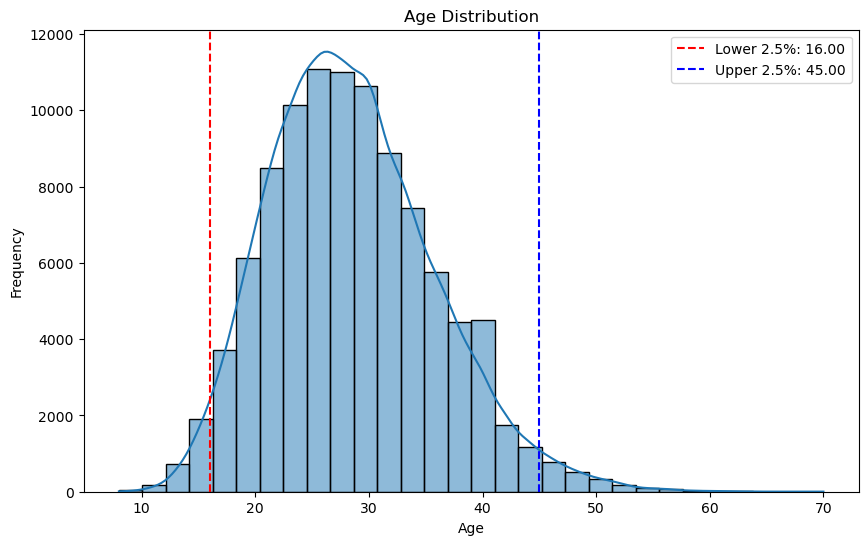

In [82]:
# 'age' 컬럼의 히스토그램을 그립니다.
plt.figure(figsize=(10, 6))
sns.histplot(model_data['age'], bins=30, kde=True)  # KDE는 커널 밀도 추정을 나타냅니다.

# 상위 2.5%와 하위 2.5%의 값을 구합니다.
lower_bound = np.percentile(model_data['age'].dropna(), 2.5)
upper_bound = np.percentile(model_data['age'].dropna(), 97.5)

# 세로선을 그립니다.
plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Lower 2.5%: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='b', linestyle='--', label=f'Upper 2.5%: {upper_bound:.2f}')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()  # 범례를 표시합니다.
plt.show()


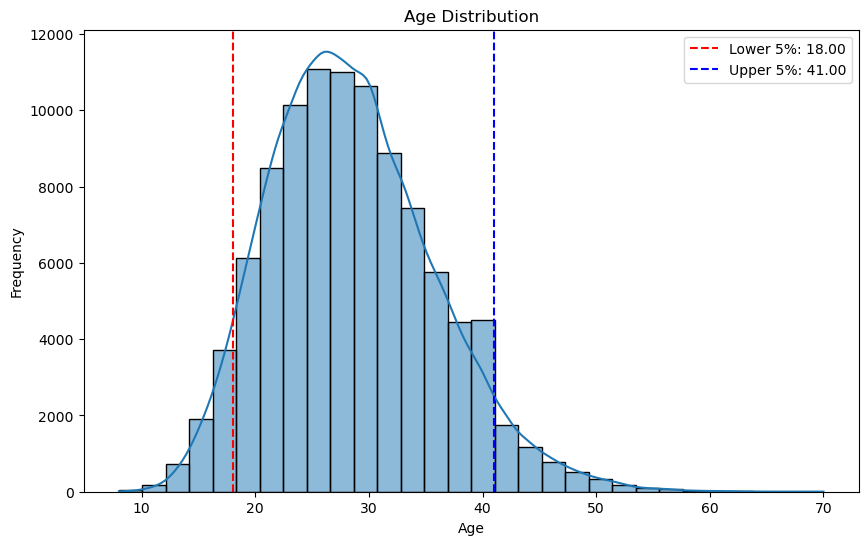

In [83]:
# 'age' 컬럼의 히스토그램을 그립니다.
plt.figure(figsize=(10, 6))
sns.histplot(model_data['age'], bins=30, kde=True)  # KDE는 커널 밀도 추정을 나타냅니다.

# 상위 2.5%와 하위 2.5%의 값을 구합니다.
lower_bound = np.percentile(model_data['age'].dropna(), 5)
upper_bound = np.percentile(model_data['age'].dropna(), 95)

# 세로선을 그립니다.
plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Lower 5%: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='b', linestyle='--', label=f'Upper 5%: {upper_bound:.2f}')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()  # 범례를 표시합니다.
plt.show()


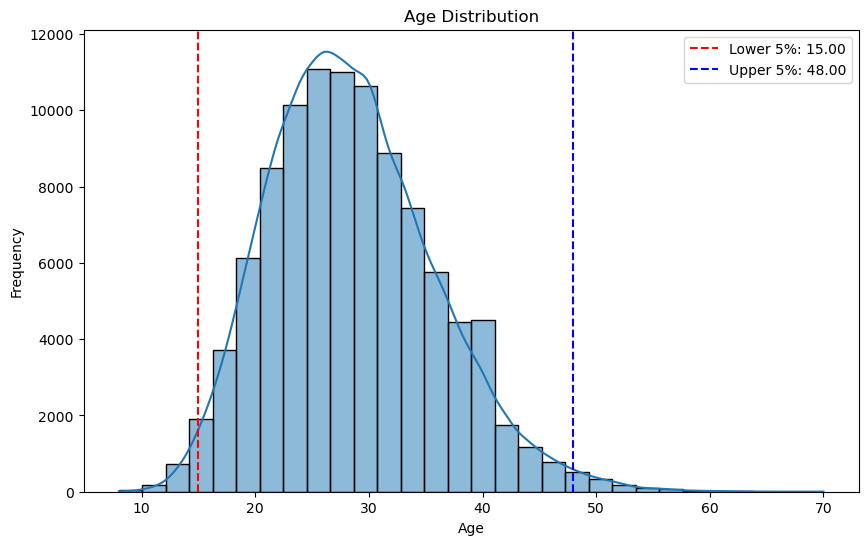

In [84]:
# 'age' 컬럼의 히스토그램을 그립니다.
plt.figure(figsize=(10, 6))
sns.histplot(model_data['age'], bins=30, kde=True)  # KDE는 커널 밀도 추정을 나타냅니다.

# 상위 2.5%와 하위 2.5%의 값을 구합니다.
lower_bound = np.percentile(model_data['age'].dropna(), 1)
upper_bound = np.percentile(model_data['age'].dropna(), 99)

# 세로선을 그립니다.
plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Lower 5%: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='b', linestyle='--', label=f'Upper 5%: {upper_bound:.2f}')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()  # 범례를 표시합니다.
plt.show()


In [85]:
# 'first_join_date' 컬럼의 데이터 타입 확인
print(cu['first_join_date'].dtype)

# 만약 'first_join_date' 컬럼의 데이터 타입이 datetime이 아니라면 변환
if cu['first_join_date'].dtype != 'datetime64[ns]':
    cu['first_join_date'] = pd.to_datetime(cu['first_join_date'])

# 이제 연도와 월만 추출
cu['first_join'] = cu['first_join_date'].dt.to_period('M')

# 'model_data' 데이터프레임에 해당 정보를 복사 (만약 'model_data3'가 이미 'cu'의 정보를 포함하고 있다면)
model_data3['first_join'] = cu['first_join']

# 결과 확인
print(model_data3['first_join'].head())

object
0    2019-07
1    2017-07
2    2020-08
3    2021-10
4    2021-04
Name: first_join, dtype: period[M]


In [86]:
model_data3

,churn,gender,age,device,device_version2,home_location,customer_id,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index,first_join
0,1,F,28,iPhone,14,Sumatera Barat,2870,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650,2019-07
1,1,F,31,Android,2,Jakarta Raya,8193,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650,2017-07
2,0,M,35,iPad,4,Nusa Tenggara Barat,7279,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744,2020-08
3,1,M,33,iPad,14,Kalimantan Timur,88813,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650,2021-10
4,1,M,24,iPhone,10,Kalimantan Selatan,82542,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,M,24,Android,4,Lampung,34743,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877,2020-10
99996,0,M,26,Android,8,Aceh,72065,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386,2017-11
99997,0,F,31,Android,11,Maluku,32818,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396,2018-09
99998,1,M,24,Android,7,Jambi,75597,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650,2020-05


In [87]:
# 'first_join_date' 컬럼의 데이터 타입 확인
print(cu['first_join_date'].dtype)

# 만약 'first_join_date' 컬럼의 데이터 타입이 datetime이 아니라면 변환
if cu['first_join_date'].dtype != 'datetime64[ns]':
    cu['first_join_date'] = pd.to_datetime(cu['first_join_date'])

# 이제 연도와 월만 추출
cu['first_join'] = cu['first_join_date'].dt.to_period('M')

# 'model_data' 데이터프레임에 해당 정보를 복사 (만약 'model_data'가 이미 'cu'의 정보를 포함하고 있다면)
model_data['first_join'] = cu['first_join']

# 결과 확인
print(model_data['first_join'].head())


datetime64[ns]
0    2019-07
1    2017-07
2    2020-08
3    2021-10
4    2021-04
Name: first_join, dtype: period[M]


In [88]:
model_data

,customer_id,churn,gender,age,device,device_version2,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index,first_join
0,2870,1,F,28,iPhone,14,Sumatera Barat,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650,2019-07
1,8193,1,F,31,Android,2,Jakarta Raya,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650,2017-07
2,7279,0,M,35,iPad,4,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744,2020-08
3,88813,1,M,33,iPad,14,Kalimantan Timur,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650,2021-10
4,82542,1,M,24,iPhone,10,Kalimantan Selatan,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,0,M,24,Android,4,Lampung,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877,2020-10
99996,72065,0,M,26,Android,8,Aceh,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386,2017-11
99997,32818,0,F,31,Android,11,Maluku,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396,2018-09
99998,75597,1,M,24,Android,7,Jambi,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650,2020-05


In [89]:
model_data3 = model_data3[(model_data3['age'] >= 16) & (model_data3['age'] <= 45)].reset_index(drop=True)
model_data3

,churn,gender,age,device,device_version2,home_location,customer_id,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index,first_join
0,1,F,28,iPhone,14,Sumatera Barat,2870,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650,2019-07
1,1,F,31,Android,2,Jakarta Raya,8193,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650,2017-07
2,0,M,35,iPad,4,Nusa Tenggara Barat,7279,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744,2020-08
3,1,M,33,iPad,14,Kalimantan Timur,88813,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650,2021-10
4,1,M,24,iPhone,10,Kalimantan Selatan,82542,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96273,0,M,24,Android,4,Lampung,34743,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877,2020-10
96274,0,M,26,Android,8,Aceh,72065,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386,2017-11
96275,0,F,31,Android,11,Maluku,32818,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396,2018-09
96276,1,M,24,Android,7,Jambi,75597,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650,2020-05


In [90]:
model_data2 = model_data2[(model_data['age'] >= 16) & (model_data2['age'] <= 45)].reset_index(drop=True)
model_data2

,churn,gender,device,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,delivery_period,average_shipment_fee,average_distance,churn_risk_index,age
0,1,F,iPhone,Sumatera Barat,0.000000,0.000000,0.000000,0.000000,37,2019,6.000000,50000.000000,4052.667143,1.975650,28
1,1,F,Android,Jakarta Raya,0.000000,0.000000,0.000000,0.000000,61,2017,6.000000,50000.000000,4052.667143,1.975650,31
2,0,M,iPad,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,5386.117647,24,2020,3.075949,8860.759494,752.832362,0.226744,35
3,1,M,iPad,Kalimantan Timur,0.000000,0.000000,0.000000,0.000000,10,2021,6.000000,50000.000000,4052.667143,1.975650,33
4,1,M,iPhone,Kalimantan Selatan,0.062500,115702.000000,0.000000,0.000000,16,2021,1.000000,0.000000,0.000000,2.996627,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96273,0,M,Android,Lampung,1.590909,324990.142857,0.545455,7045.166667,22,2020,3.400000,8000.000000,522.233922,0.209877,24
96274,0,M,Android,Aceh,0.719298,557404.097561,0.228070,5376.692308,57,2017,3.097561,9634.146341,1443.259657,0.767386,26
96275,0,F,Android,Maluku,2.042553,376070.156250,0.765957,4931.111111,47,2018,3.145833,8489.583333,1101.739088,0.136396,31
96276,1,M,Android,Jambi,0.000000,0.000000,0.000000,0.000000,27,2020,6.000000,50000.000000,4052.667143,1.975650,24


In [91]:
model_data = model_data[(model_data['age'] >= 16) & (model_data['age'] <= 45)].reset_index(drop=True)


In [92]:
model_data

,customer_id,churn,gender,age,device,device_version2,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index,first_join
0,2870,1,F,28,iPhone,14,Sumatera Barat,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650,2019-07
1,8193,1,F,31,Android,2,Jakarta Raya,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650,2017-07
2,7279,0,M,35,iPad,4,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744,2020-08
3,88813,1,M,33,iPad,14,Kalimantan Timur,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650,2021-10
4,82542,1,M,24,iPhone,10,Kalimantan Selatan,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96273,34743,0,M,24,Android,4,Lampung,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877,2020-10
96274,72065,0,M,26,Android,8,Aceh,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386,2017-11
96275,32818,0,F,31,Android,11,Maluku,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396,2018-09
96276,75597,1,M,24,Android,7,Jambi,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650,2020-05


In [93]:
#model_data2.to_csv('model_data2.csv', index=False)

In [94]:
model_data4 = model_data.copy()

In [101]:
model_data4['churn'].value_counts(normalize=True)

1    0.748645
0    0.251355
Name: churn, dtype: float64

In [95]:
#model_data.to_csv('model_data.csv', index=False)
model_data4.to_csv('model_data4.csv', index=False)

In [96]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96278 entries, 0 to 96277
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   customer_id           96278 non-null  int64    
 1   churn                 96278 non-null  int32    
 2   gender                96278 non-null  object   
 3   age                   96278 non-null  int64    
 4   device                96278 non-null  object   
 5   device_version2       96278 non-null  int64    
 6   home_location         96278 non-null  object   
 7   month_tr              96278 non-null  float64  
 8   average_price         96278 non-null  float64  
 9   promo_count           96278 non-null  float64  
 10  average_promo_amount  96278 non-null  float64  
 11  join_period           96278 non-null  int64    
 12  first_join_year       96278 non-null  object   
 13  purchase_cycle        96278 non-null  int64    
 14  delivery_period       96278 non-null  

In [97]:
model_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96278 entries, 0 to 96277
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 96278 non-null  int32  
 1   gender                96278 non-null  object 
 2   device                96278 non-null  object 
 3   home_location         96278 non-null  object 
 4   month_tr              96278 non-null  float64
 5   average_price         96278 non-null  float64
 6   promo_count           96278 non-null  float64
 7   average_promo_amount  96278 non-null  float64
 8   join_period           96278 non-null  int64  
 9   first_join_year       96278 non-null  object 
 10  delivery_period       96278 non-null  float64
 11  average_shipment_fee  96278 non-null  float64
 12  average_distance      96278 non-null  float64
 13  churn_risk_index      96278 non-null  float64
 14  age                   96278 non-null  int64  
dtypes: float64(8), int3

In [98]:
model_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96278 entries, 0 to 96277
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   churn                 96278 non-null  int32    
 1   gender                96278 non-null  object   
 2   age                   96278 non-null  int64    
 3   device                96278 non-null  object   
 4   device_version2       96278 non-null  int64    
 5   home_location         96278 non-null  object   
 6   customer_id           96278 non-null  int64    
 7   month_tr              96278 non-null  float64  
 8   average_price         96278 non-null  float64  
 9   promo_count           96278 non-null  float64  
 10  average_promo_amount  96278 non-null  float64  
 11  join_period           96278 non-null  int64    
 12  first_join_year       96278 non-null  object   
 13  purchase_cycle        96278 non-null  int64    
 14  delivery_period       96278 non-null  

In [99]:
#model_data3.to_csv('model_data3.csv', index=False)

In [100]:
dgh

NameError: name 'dgh' is not defined

In [ ]:
correlation_matrix = model_data.corr()

# 상관계수 행렬의 heatmap 생성
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

- 카이제곱 검정 (Chi-Squared Test):

범주형 변수와 타겟 변수 간의 독립성을 검증하는 통계적 방법입니다. 

두 변수가 독립적이라는 귀무가설 하에서 p-value를 계산하며, p-value가 특정 임계치 (예: 0.05) 아래라면 해당 범주형 변수와 타겟 변수는 관계가 있다고 판단할 수 있습니다.

In [ ]:
# 교차표 (contingency table) 생성
contingency_table = pd.crosstab(model_data['gender'], model_data['churn'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("연관성 있음")
else:
    print("관련 없음")

In [ ]:

# 범주형 변수 리스트
categorical_columns = ['gender', 'device', 'first_join']

for column in categorical_columns:
    contingency_table = pd.crosstab(model_data[column], model_data['churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"\nFor variable: {column}")
    print(f"Chi2 value: {chi2}")
    print(f"P-value: {p}")
    
    if p < 0.05:
        print(f" {column} 컬럼과 churn (타겟) 컬럼은 연관성이 있음")
    else:
        print(f" {column} 컬럼과 churn (타겟) 컬럼은 관련이 없음")


In [ ]:
correlation_matrix = model_data2.corr()

# 상관계수 행렬의 heatmap 생성
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()